# Classify different data sets

### Basic includes

In [164]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

### Classify the Fashion Mnist

---

(60000, 28, 28)


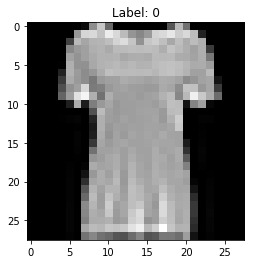

In [165]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [166]:
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))# Normalizar datos
fashion_train_data = fashion_train_data.astype('float32') / 255# Normalizar datos
fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

In [167]:
fashion_train_labels = to_categorical(fashion_train_labels) #hot encoding
fashion_test_labels = to_categorical(fashion_test_labels)#hot encoding

In [168]:
validation_data = fashion_train_data[:30000] #Validación
validation_labels = fashion_train_labels[:30000] #Validación
x_data = fashion_train_data[30000:]
y_data = fashion_train_labels[30000:]


In [175]:
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape= (28 * 28,)))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2)
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [177]:
history = network.fit(x_data, y_data, epochs=25, validation_data = (validation_data, validation_labels), callbacks=[early_stop], verbose=2)

Train on 30000 samples, validate on 30000 samples
Epoch 1/25
 - 6s - loss: 0.3419 - acc: 0.8757 - val_loss: 0.3583 - val_acc: 0.8728
Epoch 2/25
 - 5s - loss: 0.3365 - acc: 0.8765 - val_loss: 0.3486 - val_acc: 0.8762
Epoch 3/25
 - 5s - loss: 0.3312 - acc: 0.8765 - val_loss: 0.3317 - val_acc: 0.8812
Epoch 4/25
 - 4s - loss: 0.3283 - acc: 0.8797 - val_loss: 0.3348 - val_acc: 0.8810
Epoch 5/25
 - 5s - loss: 0.3243 - acc: 0.8799 - val_loss: 0.3332 - val_acc: 0.8814


10000/10000 [==============================] - 1s 63us/step
test loss:  0.36716508737802506 test accuracy:  0.8691


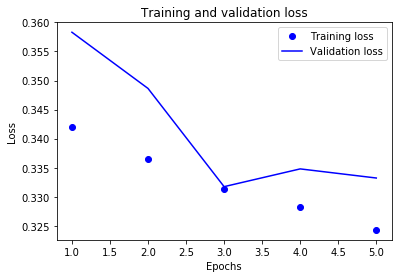

In [179]:
test_loss, test_acc = network.evaluate(fashion_test_data, fashion_test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc) #imprimir evaluación
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') #graficas
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

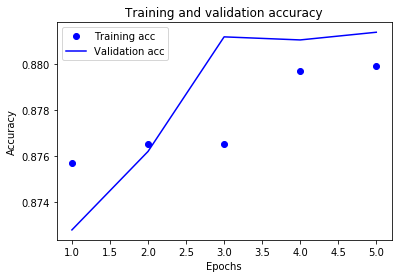

In [181]:

plt.clf()   
plt.plot(epochs, acc, 'bo', label='Training acc') #Grñafica de entrenamiento
plt.plot(epochs, val_acc, 'b', label='Validation acc') #Gráfica de validación
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [182]:
(reuters_train_data, reuters_train_labels), (reuters_test_data, reuters_test_labels) = reuters.load_data(num_words=10000)

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [183]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> <UNKNOWN> <UNKNOWN> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [186]:
tokenizer = Tokenizer(num_words=8982)
train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode='binary') #Normalizando
test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode='binary')
one_hot_train_labels = to_categorical(reuters_train_labels) #hot encoding
one_hot_test_labels = to_categorical(reuters_test_labels)



In [187]:
validation_data = train_data_token[:3000] #validación
validation_labels = one_hot_train_labels[:3000]
x_data = train_data_token[3000:]
y_data = one_hot_train_labels[3000:]


In [191]:

network = models.Sequential()
network.add(layers.Dense(92, activation='relu', input_shape= (8982,)))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(46, activation='softmax'))
network.add(layers.Dropout(0.2))
network.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 92)                826436    
_________________________________________________________________
dropout_49 (Dropout)         (None, 92)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 46)                4278      
_________________________________________________________________
dropout_50 (Dropout)         (None, 46)                0         
Total params: 830,714
Trainable params: 830,714
Non-trainable params: 0
_________________________________________________________________


In [192]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=6)
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [194]:
history = network.fit(x_data, y_data, epochs=15, validation_data = (validation_data, validation_labels), callbacks=[early_stop], verbose=2) #entrenamiento

Train on 5982 samples, validate on 3000 samples
Epoch 1/15
 - 4s - loss: 3.3350 - acc: 0.7775 - val_loss: 0.9927 - val_acc: 0.8030
Epoch 2/15
 - 4s - loss: 3.3791 - acc: 0.7732 - val_loss: 1.0194 - val_acc: 0.8033
Epoch 3/15
 - 4s - loss: 3.1882 - acc: 0.7850 - val_loss: 1.0500 - val_acc: 0.8033
Epoch 4/15
 - 4s - loss: 3.3338 - acc: 0.7767 - val_loss: 1.0196 - val_acc: 0.8043
Epoch 5/15
 - 4s - loss: 3.3476 - acc: 0.7743 - val_loss: 1.0730 - val_acc: 0.8017
Epoch 6/15
 - 4s - loss: 3.3471 - acc: 0.7763 - val_loss: 1.0612 - val_acc: 0.8023
Epoch 7/15
 - 4s - loss: 3.3135 - acc: 0.7780 - val_loss: 1.0533 - val_acc: 0.8040


In [195]:
test_loss, test_acc = network.evaluate(test_data_token, one_hot_test_labels) #evaluando
print("test loss: ", test_loss, "test accuracy: ", test_acc)

2246/2246 [==============================] - 1s 355us/step
test loss:  1.12112430473151 test accuracy:  0.7911843277202157


In [196]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

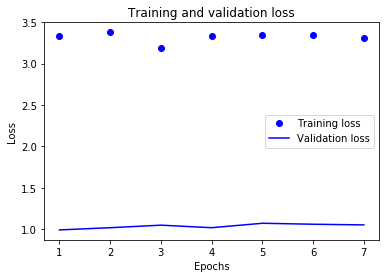

In [197]:

plt.plot(epochs, loss, 'bo', label='Training loss') #gráfica 

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

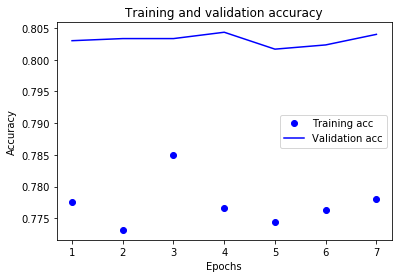

In [199]:


plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') #gráfica de validación
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [232]:
student_data = pd.read_csv("data/student_data.csv") #se creo carpeta data
print(student_data)

     admit    gre   gpa  rank
0        0  380.0  3.61   3.0
1        1  660.0  3.67   3.0
2        1  800.0  4.00   1.0
3        1  640.0  3.19   4.0
4        0  520.0  2.93   4.0
5        1  760.0  3.00   2.0
6        1  560.0  2.98   1.0
7        0  400.0  3.08   2.0
8        1  540.0  3.39   3.0
9        0  700.0  3.92   2.0
10       0  800.0  4.00   4.0
11       0  440.0  3.22   1.0
12       1  760.0  4.00   1.0
13       0  700.0  3.08   2.0
14       1  700.0  4.00   1.0
15       0  480.0  3.44   3.0
16       0  780.0  3.87   4.0
17       0  360.0  2.56   3.0
18       0  800.0  3.75   2.0
19       1  540.0  3.81   1.0
20       0  500.0  3.17   3.0
21       1  660.0  3.63   2.0
22       0  600.0  2.82   4.0
23       0  680.0  3.19   4.0
24       1  760.0  3.35   2.0
25       1  800.0  3.66   1.0
26       1  620.0  3.61   1.0
27       1  520.0  3.74   4.0
28       1  780.0  3.22   2.0
29       0  520.0  3.29   1.0
..     ...    ...   ...   ...
370      1  540.0  3.77   2.0
371      1

Plot of the GRE and the GPA from the data.

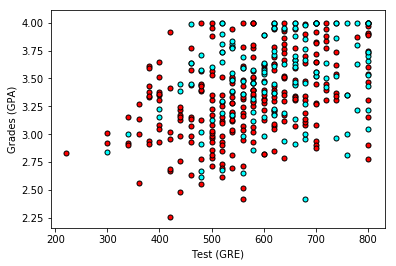

In [253]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

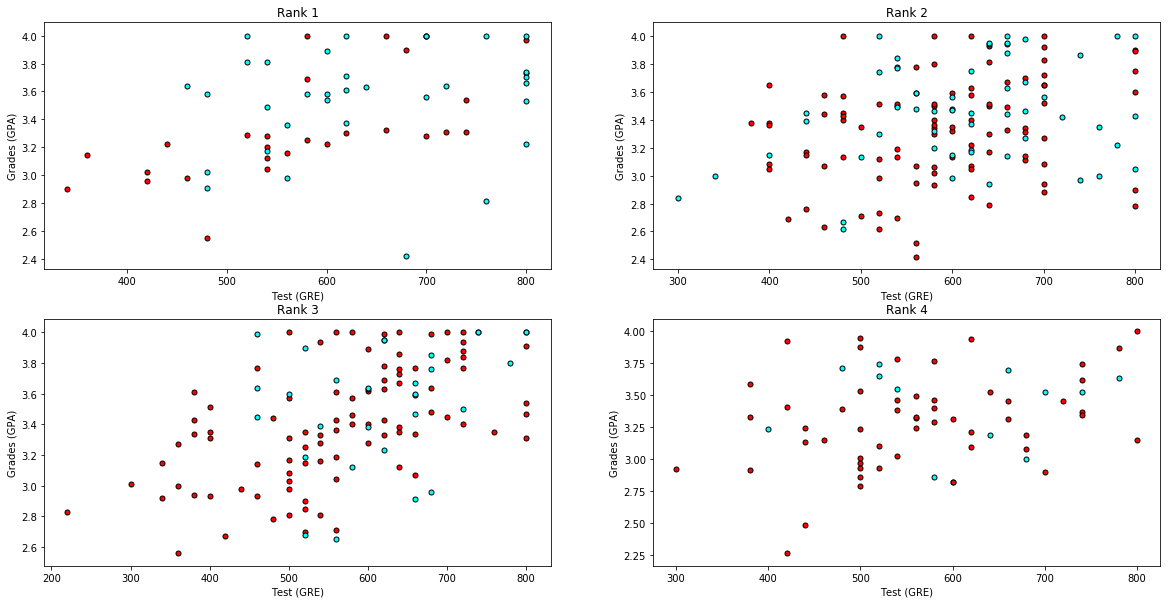

In [254]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [258]:
student_data = student_data.fillna(0)
normalized_student_data = pd.get_dummies(student_data, columns=['rank']) #normalizando
normalized_student_data["gre"] = normalized_student_data["gre"] / 800
normalized_student_data["gpa"] = normalized_student_data["gpa"] / 4
np.random.shuffle(normalized_student_data.values)

student_x = np.array(normalized_student_data)[:,1:]
student_x = student_x.astype('float32')
student_y = to_categorical(student_data["admit"])


In [259]:

student_validation_data = student_x[:100] #validando
student_validation_labels = student_y[:100]
student_x_data = student_x[100:]
student_y_data = student_y[100:]


In [269]:


student_NN_model = models.Sequential([
    layers.Dense(128, activation='relu', kernel_initializer='random_uniform', input_shape=(7,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
    ])

student_NN_model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

student_NN_model.summary()
    
student_history = student_NN_model.fit(student_x_data, student_y_data, epochs=15, batch_size=100, validation_data=(student_validation_data,student_validation_labels))
    
student_results = student_NN_model.evaluate(student_x[80:200], student_y[80:200])

print('student Test accuracy:', student_results)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 128)               1024      
_________________________________________________________________
dropout_59 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_60 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_86 (Dense)             (None, 2)                 66        
Total params: 11,426
Trainable params: 11,426
Non-trainable params: 0
_________________________________________________________________
Train 

In [272]:


student_history_dict = student_history.history
print(student_history_dict.keys())


student_acc = student_history_dict['acc']
student_val_acc = student_history_dict['val_acc']
student_loss = student_history_dict['loss']
student_val_loss = student_history_dict['val_loss']

student_epochs = range(1, len(student_acc) + 1)



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


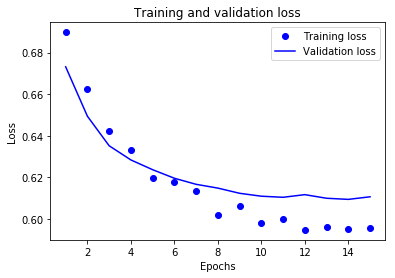

In [274]:

plt.plot(student_epochs, student_loss, 'bo', label='Training loss')

plt.plot(student_epochs, student_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



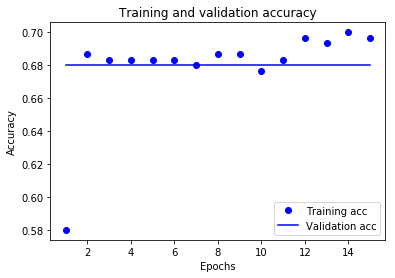

In [275]:

plt.clf()

plt.plot(student_epochs, student_acc, 'bo', label='Training acc')
plt.plot(student_epochs, student_val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()